In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import os

In [21]:
path = r"C:\Users\t1526\Project\pdiff\Neural-Network-Diffusion\dataset\ablation\numberckpt_200\result_process"
paths = os.listdir(path)
paths.sort()
value = []
for filename in paths:
    filepath = os.path.join(path, filename)
    if filepath.endswith("cache") and os.path.basename(filepath).startswith("plot"):
        with open(filepath, "rb") as f:
            data = pickle.load(f)[0]
            total_acc_list = data["total_acc_list"]
            generated_acc_list = total_acc_list[data["num_checkpoint"]:data["num_checkpoint"]+data["num_generated"]]
            value.append(generated_acc_list)

df = pd.DataFrame({
    'time': np.tile(np.arange(0, 1002, 2), 5),
    'value': np.array(value).flatten() * 100,
    'random seed': np.repeat([str(i) for i in range(2024, 2029)], 501)
})
max_value = 76.0

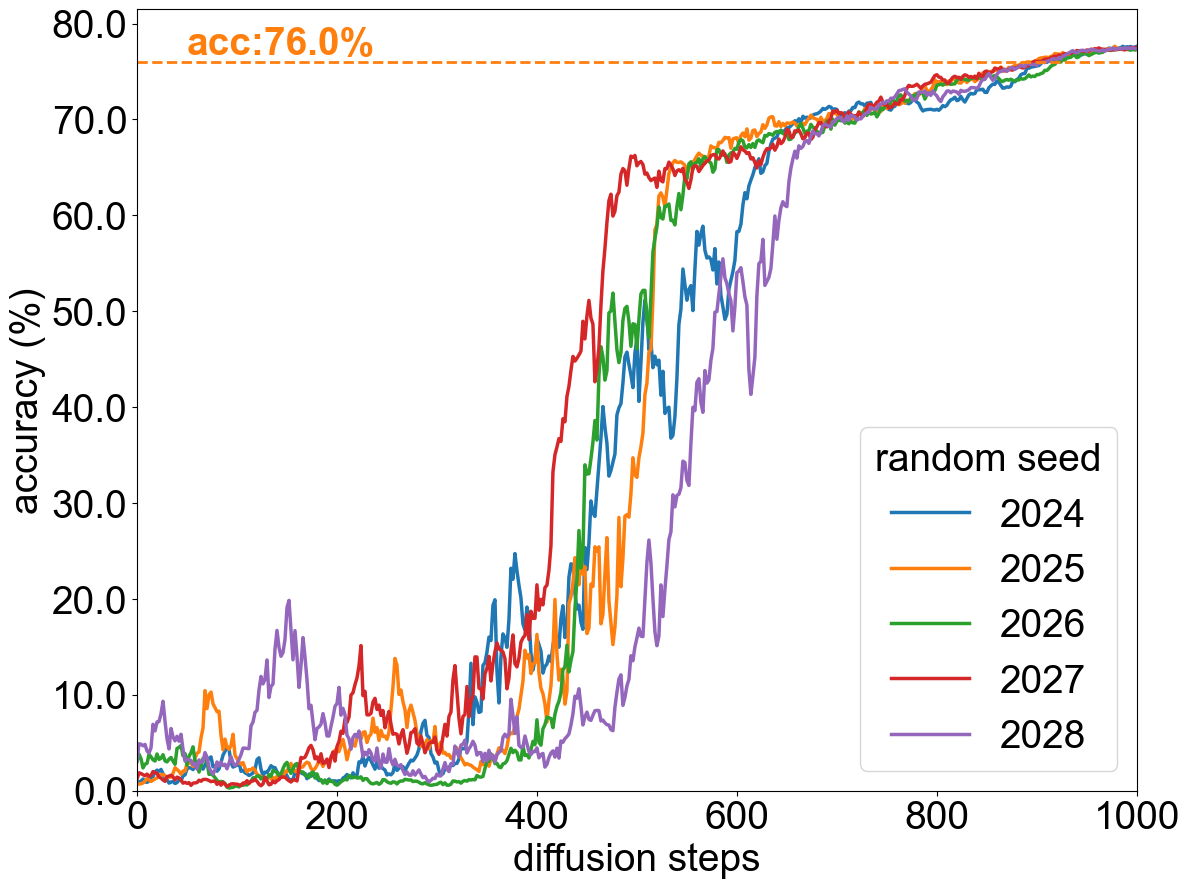

In [26]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Liberation Sans', 'Arial', 'DejaVu Sans', 'Helvetica']
fig, ax1 = plt.subplots(figsize=(12, 9))

sns.lineplot(x='time', y='value', hue='random seed', data=df, linewidth=2.5)

ax1.set_ylim(0.0, 81.5)
ax1.set_xlim(0.0, 1000.0)
ax1.tick_params(axis='both', which='major', labelsize=28)
ax1.set_ylabel("accuracy (%)", fontsize=28)
ax1.set_xlabel("diffusion steps", fontsize=28)
plt.legend(title="random seed", fontsize=28, title_fontsize=28, loc='lower right')
ax1.axhline(y=max_value, color='#ff7f0e', linestyle='--', linewidth=2)
ax1.text(50, max_value, f'acc:{max_value}%', ha='left', va='bottom', fontsize=28, color='#ff7f0e', weight='bold')
def format_y_axis(x, pos):
    return f'{x:.1f}'
ax1.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

plt.tight_layout()
plt.savefig("draw_diffusion_process.pdf")